# **Summer Project Notebook**

In this notebook we will keep a record of the (first) custom CNN for classification of galaxies for the Year 1 Summer Project. Computing will be done with GPU, or converted to CPU if not possible.

The following links will be used as guides for the development of the first model:

-*Multi-Class Classification*
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

-*Multi-Label Classification of Satellite Photos of the Amazon Rainforest*:
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-satellite-photos-of-the-amazon-rainforest/

-*Introduction to Galaxy10 DECals Dataset*:
https://astronn.readthedocs.io/en/latest/galaxy10.html#introduction


##Part 1: Setting up GPU & necessary modules

In this section I will set up the necessary code to test for running with GPU, as well as importing the modules used throughout the code.

In [ ]:
# Importing necessary packages

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# Checking for GPU activity

%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Part 2: Data Import & Final Processing

In this section we will load the compressed grayscale galaxy images from 'taand ensure it is in the proper format for further processing. Additionally, we will import a previously created file of label vectors (in form of numpoy arrays) representing the target elements for each of our images, e.g. for image of Class 2:

target = [0 0 1 0 0 0 0 0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating a routine to return a numpy array of label vectors per image index
# i.e. one-hot encoding our data labels

#target_list = []
#for i in range(len(labels)):
  #label_vec = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
  #label_index = int(labels[i])
  #label_vec[label_index] = 1
  #target_list.append(label_vec)

#y = np.array(target_list, dtype='uint8')
#np.savetxt('target_vec.csv', y, delimiter=',')
#print(y[:10])

In [ ]:
# Loading in our files

X = np.loadtxt("/content/drive/MyDrive/Summer Project/final_data.csv", delimiter=",")
X = np.reshape(X, (17402, 64, 64))
print("X.dtype = ", X.dtype)

y = np.loadtxt("/content/drive/MyDrive/Summer Project/targets.csv", delimiter=',')
print("y.dtype = ", y.dtype)

#Checking data shape of images and labels
print('Loaded: ', X.shape, y.shape)
print(y[:10])

X.dtype =  float64
y.dtype =  float64
Loaded:  (17402, 64, 64) (17402, 9)
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Split into test and training data

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=1)

#print(trainY[:10])
#print(trainX[:10])

print('Data shape: trainX, testX, trainY, testY')
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

Data shape: trainX, testX, trainY, testY
(13921, 64, 64) (3481, 64, 64) (13921, 9) (3481, 9)


## Part 3: Defining, compiling and fitting model

In this section we will define our baseline model adapted from a Kaggle custom convnet example. The loss function used is that of Cross entropy, which is the default loss function for multi-class classification. The optimizer used is Adam. We plot loss and accuracy during training of the model.

Train: 0.962, Test: 0.546


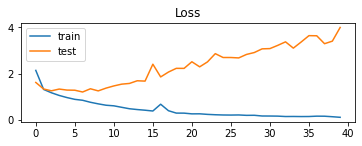

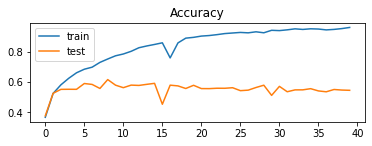

In [ ]:
#y = to_categorical(y) #to one-hot encode output variable

base_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = base_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_acc = base_model.evaluate(trainX, trainY, verbose=0)
_, test_acc = base_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure()
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.savefig('LC_1.png', dpi=400)
plt.show()

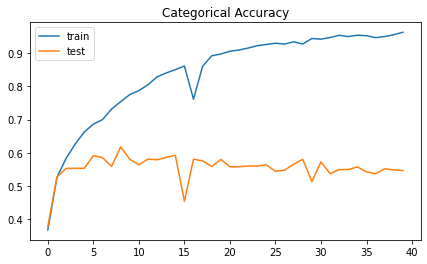

In [ ]:

# plot accuracy during training
plt.figure(figsize=(7, 4))
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.savefig('LC_1.png', dpi=400)
plt.show()

We now attempt to interpret the loss and accuracy curves:

-Firstly, we can see that the model performance is steadily increasing on the training, but not the test data, which is indicative of overfitting.

-The loss for the test data is increasing, and is notably greater than 1. This is possible for a logarithmic loss function such as crossentropy:

https://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1/35015188#35015188

""If we look at the case where the average log loss exceeds 1, it is when log(pij) < -1 when i is the true class. This means that the predicted probability for that given class would be less than exp(-1) or around 0.368. So, seeing a log loss greater than one can be expected in the case that your model only gives less than a 36% probability estimate for the actual class.""

We may attempt to solve the issue of overfitting by introducing dropout.



Train: 0.152, Test: 0.153


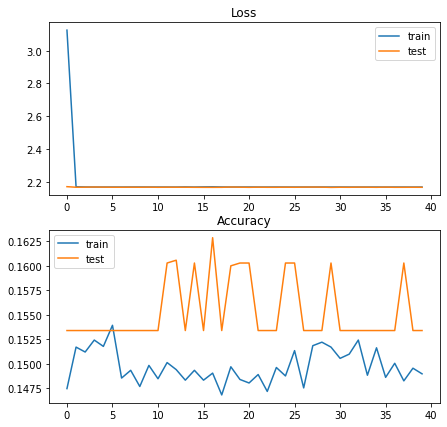

In [ ]:
drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

drop_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_acc = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

plt.figure(figsize=(7, 7))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('LC_2.png', dpi=400)
plt.show()

This is already a much closer performance than seen earlier, with a test accuracy of around 60% at best (consider introducing early stopping to optimize further). We can now experiment with different changes to the model to attempt to optimize it further.

Train: 0.778, Test: 0.602


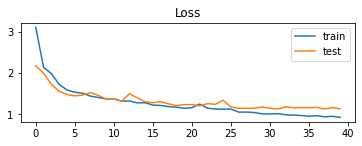

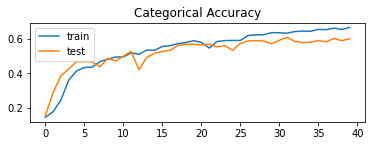

In [ ]:
#Attempt with 'categorical_accuracy' instead of accuracy

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

drop_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

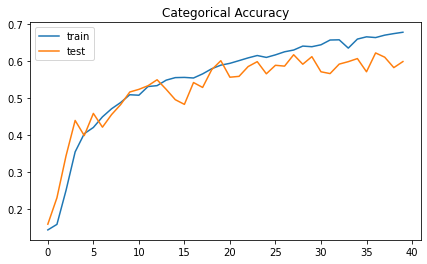

In [ ]:
plt.figure(figsize=(7, 4))
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.savefig('LC_2.png', dpi=400)
plt.show()

We still have some slight overfitting, and quite unstable
training, so experimentation with batch normalization and seeing what happens with more epochs could be useful.

https://analyticsindiamag.com/everything-you-should-know-about-dropouts-and-batchnormalization-in-cnn/

We will now study different types of metrics in order to improve our model.

In [ ]:
#Attempt with 'Precision' instead of accuracy

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

drop_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Precision'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_precision = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_precision = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_precision, test_precision))

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Precision')
plt.plot(history.history['precision'], label='train')
plt.plot(history.history['val_precision'], label='test')
plt.legend()
plt.show()

Train: 0.556, Test: 0.421


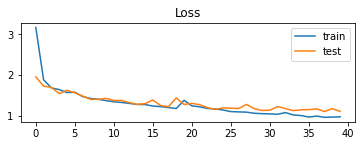

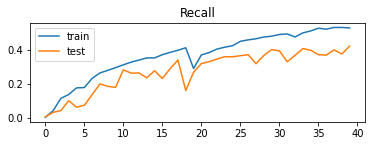

In [ ]:
#Attempt with 'Recall' instead of accuracy

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

drop_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Recall'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_recall = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_recall = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_recall, test_recall))

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Recall')
plt.plot(history.history['recall'], label='train')
plt.plot(history.history['val_recall'], label='test')
plt.legend()
plt.show()

Recall score quite low, so relatively large number

In [ ]:
#Plotting ROC and AUC for model with "accuracy" metric

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

drop_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)

_, train_acc = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.786, Test: 0.592


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


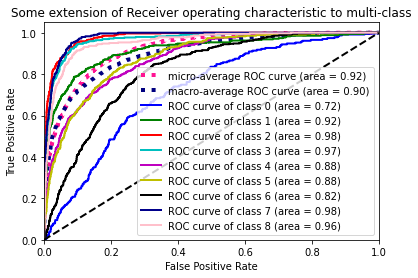

In [ ]:
n_classes = 9

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
scoreY = drop_model.predict(testX)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], scoreY[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), scoreY.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ["b", "g", "r", "c", "m", "y", "k", "darkblue", "pink"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Now experimenting further with differnet learning rates.

Default learning rate for Adam is 1e-3, now attempting training with a loop of smaller learning rates.

Learning Rate =  0.0001
Train: 0.792, Test: 0.650


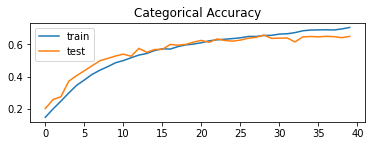

Learning Rate =  1e-05
Train: 0.831, Test: 0.664


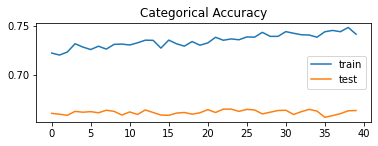

Learning Rate =  1e-06
Train: 0.836, Test: 0.664


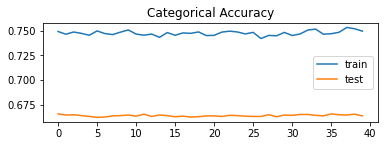

Learning Rate =  1e-07
Train: 0.835, Test: 0.665


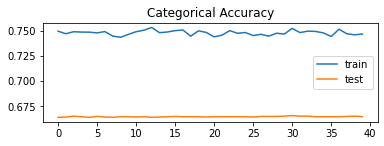

In [ ]:


drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

def fit_model_lr(lr):
  opt = keras.optimizers.Adam(learning_rate = lr)
  drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
  history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=40, verbose=0)
  print("Learning Rate = ", lr)
  _, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
  _, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Categorical Accuracy')
  plt.plot(history.history['categorical_accuracy'], label='train')
  plt.plot(history.history['val_categorical_accuracy'], label='test')
  plt.legend()
  plt.show()

learning_rates = [1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	fit_model_lr(learning_rates[i])


We can see a better training performance for the smaller learning rate of 1e-4 than the default rate of 1e-3 used before. However, as the learning rate decreases further we see nearly no learning progress being made at all.

We thus assume the optimal learning rate to be equal to 1e-4, and will use this from here on.

Now we will see if model performance improves further with longer training on a larger amount of epochs.

Epochs =  80
Train: 0.904, Test: 0.647


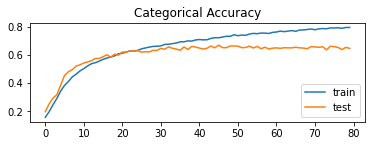

In [ ]:
drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

def fit_model_epochs(eps):
  opt = keras.optimizers.Adam(learning_rate = 1e-4)
  drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
  history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=eps, verbose=0)
  print("Epochs = ", eps)
  _, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
  _, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Categorical Accuracy')
  plt.plot(history.history['categorical_accuracy'], label='train')
  plt.plot(history.history['val_categorical_accuracy'], label='test')
  plt.legend()
  plt.show()

fit_model_epochs(80)


We can see longer training does not benefit the overall accuracy of the testing data, so we can continue training on 40 epochs only.

Below is a quick experiment with early stopping, but likely unnecessary.

Epochs =  80
Train: 0.912, Test: 0.635


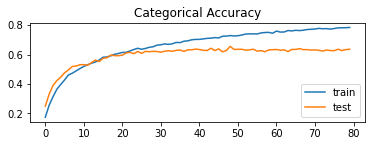

In [ ]:
from keras.callbacks import EarlyStopping

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

es = EarlyStopping(monitor='categorical_accuracy', mode='max', min_delta=0.01, patience=15, verbose=1, restore_best_weights=True)

def fit_model_epochs(eps):
  opt = keras.optimizers.Adam(learning_rate = 1e-4)
  drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
  history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=eps, verbose=0, callbacks=[es])
  print("Epochs = ", eps)
  _, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
  _, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Categorical Accuracy')
  plt.plot(history.history['categorical_accuracy'], label='train')
  plt.plot(history.history['val_categorical_accuracy'], label='test')
  plt.legend()
  plt.show()

fit_model_epochs(80)


Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Epochs =  80
Train: 0.794, Test: 0.649


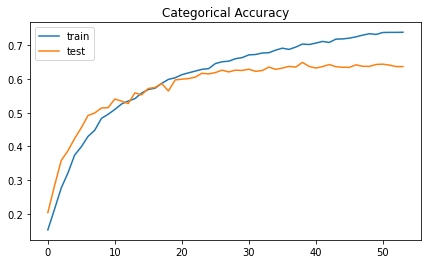

In [ ]:
from keras.callbacks import EarlyStopping

drop_model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

es = EarlyStopping(monitor='categorical_accuracy', mode='max', min_delta=0.05, patience=15, verbose=1, restore_best_weights=True)

def fit_model_epochs(eps):
  opt = keras.optimizers.Adam(learning_rate = 1e-4)
  drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
  history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=eps, verbose=0, callbacks=[es])
  print("Epochs = ", eps)
  _, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
  _, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
  # plot accuracy during training
  plt.figure(figsize=(7, 4))
  plt.title('Categorical Accuracy')
  plt.plot(history.history['categorical_accuracy'], label='train')
  plt.plot(history.history['val_categorical_accuracy'], label='test')
  plt.legend()
  plt.savefig("LC_3.png", dpi=400)
  plt.show()

fit_model_epochs(80)


In [ ]:
plt.figure(figsize=(7, 4))
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.savefig('LC_3.png', dpi=400)
plt.show()

Next we can experiment with the effect of Data Augmentation.

From visual inspection of the images, random flip, rotation and contrast would likely not affact the classification of the image so we may experiment with the addition of augmentation preprocessing layers.

Train: 0.678, Test: 0.667


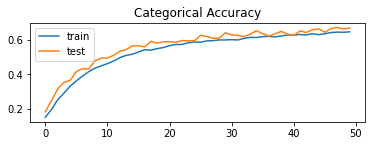

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

drop_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, verbose=0)
_, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

The addition of Data Augmentation slightly improves the model, so we may take this further in the model, training for slightly longer as well. We can now experiment with an extra addition of a dense layer and the addition of batch normalization between dense layers.

Train: 0.674, Test: 0.662


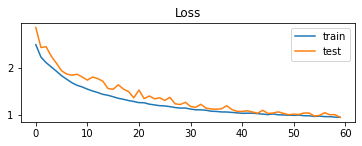

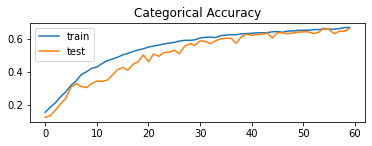

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

drop_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(units=32),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=60, verbose=0)
_, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

Train: 0.702, Test: 0.699


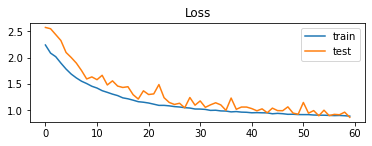

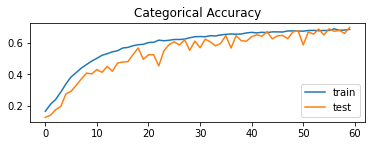

In [ ]:

drop_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=60, verbose=0)
_, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

We see a slight improvement of the model with the introduction of  batch normalization.

Final experimentation with convolutional layer settings.

In [ ]:
exp_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = drop_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=60, verbose=0)
_, train_acc_cross = drop_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = drop_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


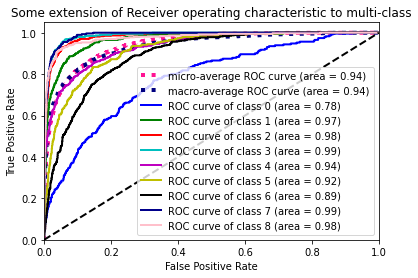

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

n_classes = 9

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
scoreY = drop_model.predict(testX)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], scoreY[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), scoreY.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ["b", "g", "r", "c", "m", "y", "k", "darkblue", "pink"]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Train: 0.681, Test: 0.666


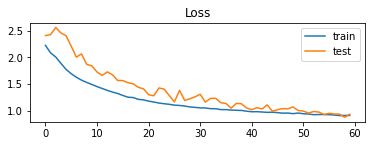

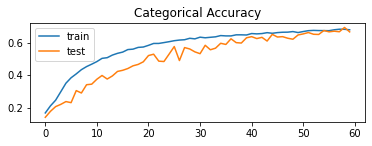

In [ ]:
final_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(units = 9, activation='softmax')])

trainX = trainX.reshape(13921,64,64,1)
testX = testX.reshape(3481, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
final_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = final_model.fit(trainX, trainY, validation_data=(testX, testY), epochs=60, verbose=0)
_, train_acc_cross = final_model.evaluate(trainX, trainY, verbose=0)
_, test_acc_cross = final_model.evaluate(testX, testY, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

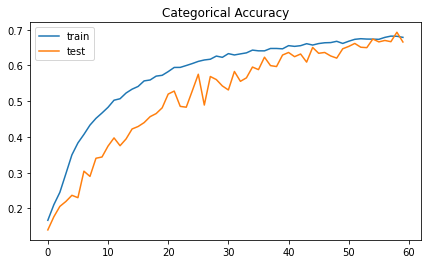

In [ ]:
plt.figure(figsize=(7, 4))
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.savefig('LC_3.png', dpi=400)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_test_pred_cont = final_model.predict(testX)
y_test_pred = np.zeros((len(y_test_pred_cont), 9))
for i in range(len(y_test_pred_cont)):
  max_j = np.argmax(y_test_pred_cont[i])
  one_hot_out = np.zeros(9)
  one_hot_out[max_j] = 1
  y_test_pred[i] = one_hot_out
#print(y_test_pred[:10])
print(classification_report(testY, y_test_pred))

              precision    recall  f1-score   support

           0       0.34      0.09      0.14       231
           1       0.93      0.41      0.57       344
           2       0.69      0.95      0.80       534
           3       0.76      0.93      0.84       390
           4       0.81      0.54      0.64       428
           5       0.54      0.62      0.58       344
           6       0.55      0.66      0.60       558
           7       0.72      0.93      0.81       290
           8       0.82      0.73      0.77       362

   micro avg       0.68      0.68      0.68      3481
   macro avg       0.68      0.65      0.64      3481
weighted avg       0.69      0.68      0.66      3481
 samples avg       0.68      0.68      0.68      3481



Class 0 performing poorly on precision, indicating large number of false positives and performing poorly on recall, indicating large number of false negatives as well. Likely this is due to class imbalance, as class 0 has nearly half of the total image numbers compared to other images. We can see what happens when we exclude class 0 from the model as a whole.

In [ ]:
X_dropped = X[1081:]
y_drop_0 = y[1081:]
#print(y_drop_0[:10])
y_dropped = np.delete(y_drop_0, 0, axis=1)
#print(y_dropped[:10])

trainX_d, testX_d, trainY_d, testY_d = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=2)
print('Data shape: trainX_d, testX_d, trainY_d, testY_d')
print(trainX_d.shape, testX_d.shape, trainY_d.shape, testY_d.shape)

Data shape: trainX_d, testX_d, trainY_d, testY_d
(13056, 64, 64) (3265, 64, 64) (13056, 8) (3265, 8)


Train: 0.748, Test: 0.751


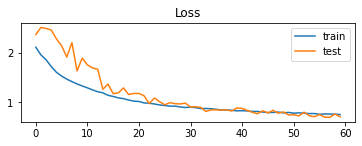

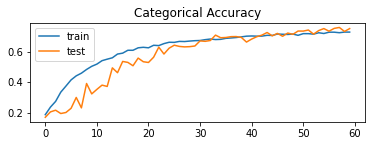

In [ ]:
no_0_model = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[64, 64, 1]),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters = 64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(units = 32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(units = 8, activation='softmax')])

trainX_d = trainX_d.reshape(13056,64,64,1)
testX_d = testX_d.reshape(3265, 64, 64, 1)

opt = keras.optimizers.Adam(learning_rate = 1e-4)
no_0_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])
history = no_0_model.fit(trainX_d, trainY_d, validation_data=(testX_d, testY_d), epochs=60, verbose=0)
_, train_acc_cross = no_0_model.evaluate(trainX_d, trainY_d, verbose=0)
_, test_acc_cross = no_0_model.evaluate(testX_d, testY_d, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_cross, test_acc_cross))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.subplot(212)
plt.title('Categorical Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred_cont_no_0 = no_0_model.predict(testX_d)
y_pred_no_0 = np.zeros((len(y_pred_cont_no_0), 8))
for i in range(len(y_pred_cont_no_0)):
  max_j = np.argmax(y_pred_cont_no_0[i])
  one_hot_out = np.zeros(8)
  one_hot_out[max_j] = 1
  y_pred_no_0[i] = one_hot_out
#print(y_test_pred[:10])
print(classification_report(testY_d, y_pred_no_0))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       376
           1       0.82      0.96      0.88       525
           2       0.87      0.87      0.87       397
           3       0.81      0.65      0.72       401
           4       0.68      0.55      0.61       336
           5       0.57      0.76      0.65       555
           6       0.72      0.93      0.81       308
           7       0.83      0.75      0.79       367

   micro avg       0.75      0.75      0.75      3265
   macro avg       0.78      0.74      0.74      3265
weighted avg       0.77      0.75      0.75      3265
 samples avg       0.75      0.75      0.75      3265



As expected, model performance much better when class 0 is excluded. Goal for future model would be to be able to introduce the excluded classes into the model despite class number imbalances.

-------------------------------------------------------------------------------

In [ ]:
# all of the "factor" parameters indicate a percent-change
augment = keras.Sequential([
    preprocessing.RandomFlip(mode='horizontal', input_shape=[64, 64, 1]),
    preprocessing.RandomFlip(mode='vertical'),
    preprocessing.RandomRotation(factor=0.3),
    preprocessing.RandomContrast(factor=0.3),
])


ex = next(iter(trainX.unbatch().map(lambda x, y: x).batch(1)))

plt.figure(figsize=(10,10))
for i in range(16):
    image = augment(ex, training=True)
    plt.subplot(4, 4, i+1)
    plt.imshow(tf.squeeze(image))
    plt.axis('off')
plt.show()

AttributeError: ignored